In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [5]:
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [6]:
#Delete unnamed columns
del df['Unnamed: 0']

In [7]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [8]:
#Show the distribution of male and female
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

In [9]:
#Show the top 5 most preferred names
df['Name'].value_counts()[:5]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [10]:
#What is the median name occurence in the dataset
df['Name'].value_counts().median()

8.0

In [23]:
#Distribution of male and female born count by states
df.groupby(['Gender','State'])["Count"].count()

Gender  State
F       AK        2404
        AL        9878
        AR        7171
        AZ       14518
        CA       45144
        CO       11424
        CT        6575
        DC        3053
        DE        2549
        FL       25781
        GA       19385
        HI        3255
        IA        7131
        ID        4918
        IL       21268
        IN       13056
        KS        7753
        KY        8817
        LA       10510
        MA       10580
        MD       11276
        ME        2976
        MI       16038
        MN       10677
        MO       11948
        MS        7235
        MT        2690
        NC       17357
        ND        2399
        NE        5370
                 ...  
M       ME        2777
        MI       13243
        MN        9004
        MO        9917
        MS        6862
        MT        2986
        NC       13530
        ND        2581
        NE        5029
        NH        2659
        NJ       12274
        NM        49

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Minimum and maximum temperature')

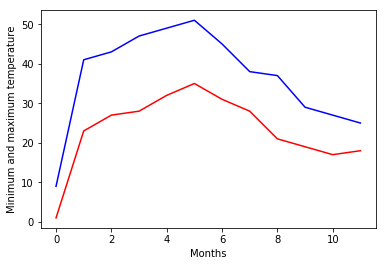

In [19]:
Max =np.array([9, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min =np.array([1, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, Min, 'r')
plt.plot(months, Max, 'b')
plt.xlabel('Months')
plt.ylabel('Minimum and maximum temperature')

In [20]:
#fitting it to the periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

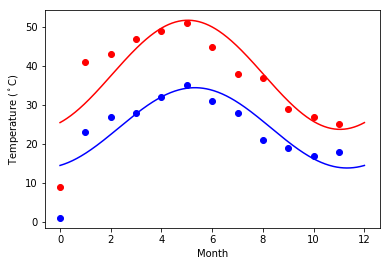

In [21]:
# plot the fit
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()